### MATH2504 S2, 2022, BigHW Submission 
### Submission form II of IV 

Student #1 name: Rachel Dudley

Student #1 ID: 46982243

Student #2 name: Wilson Wang

Student #2 ID: 46472856

GitHub repo: 

---

**Note: It is expected that this notebook be runnable in the sense that the marker can select "Restart & Run All" and all code cells of solutions will execute. This requires not to have name clashes between solutions.**

---

# Solution to [Question 5](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q5)

In [1]:
function is_perfect_number(x::Number)
    factor_ = []
        for i in 2:x
            if x % i == 0
                push!(factor_, x / i)
            end
        end
    sum_ = sum(factor_)
    
    if sum_ == x
            println("$x is a perfect number!")
#     else
#         println("$x is not a perfect number")
    end
end

is_perfect_number (generic function with 1 method)

In [2]:
for A in 2:100000
    is_perfect_number(A)
end

6 is a perfect number!
28 is a perfect number!
496 is a perfect number!
8128 is a perfect number!


---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 6](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q6)

p_array = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
typeof(p_array) = Vector{Int64}
length(p_array) = 10
First 30 primes: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
length(p_array) = 10


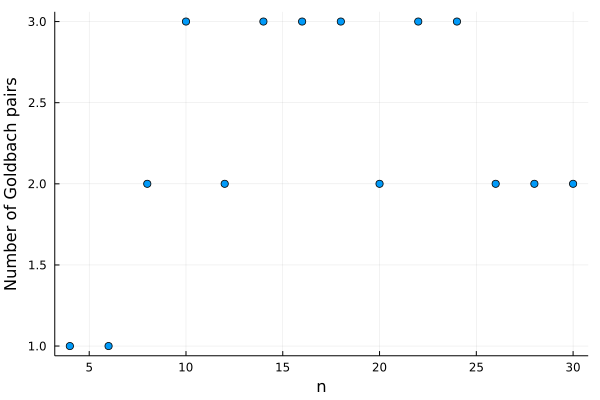

In [3]:
"""
Returns the all the primes up to n.
"""
#define an empty array here to initialise the storage to all the prime
n = 30
p_array = Array{Int64}(undef,n)
function sieve_of_Eratosthenes(n)  
    primebits = ones(Bool,n) #Will contain true if the index is prime (initially all assumed prime)
    primebits[1] = false #The number 1 is not prime
    p = 2 #Smallest prime
    while p ≤ n #while the prime number is smaller than n
        i = 2p  #i is 2 times p 
        while i ≤ n  # \le +[TAB] while i is smaller or equals to n
            primebits[i] = false #The number in the ith element is not a prime number
            i += p  # #i = i + p
        end
        p += 1 #p = p + 1
        while p ≤ n && !primebits[p] #if p is smaller or equal to n sort primebits[p]
            p += 1 # p = p + 1
            #p_array = push!(primebits[i],p_array)
        end
    end
    (1:n)[primebits]
    #p_array = push!(sieve_of_Eratosthenes(n), p_array) # 1 to n in the array of prime bits
end
p_array = sieve_of_Eratosthenes(n)  
@show p_array
@show typeof(p_array)
@show length(p_array)
n = 30
println("First $n primes: ", sieve_of_Eratosthenes(n))
#println("First $n primes: ",p_array)
#The goal is to modify the code so that it only counts each pair once
#For instance, for 22, the possible Goldbach pairs are 3+19, 5 +17, 11+11, (19+3 ), (17+5)
#But essentially 2+21 and 21+2 are the same. So the pairing should be less. But the code double count each one
#We only need to count the first half of the prime numbers



using Plots
function check_Goldbach(n)
    @assert iseven(n) #if the condition is fails throw an assertion error/ iseven make sure the input values are even
    num_pairs = 0
    if isodd(length(p_array))
        for i ∈ 1:Int((length(p_array)+1)/2)
            p_array[i] in sieve_of_Eratosthenes(n) #for the prime number stated above
                if in(n-p_array[i], sieve_of_Eratosthenes(n)) # if p is an element of n - p in the array of sieve_
                                            #because even number minus prime number is a prime number
                    num_pairs += 1 #num_pairs = num_pairs + 1
                end
        return num_pairs
    end
    elseif iseven(length(p_array))
        for i ∈ 1:Int(length(p_array)/2)
            p_array[i] in sieve_of_Eratosthenes(n) #for the prime number stated above
                if in(n-p_array[i], sieve_of_Eratosthenes(n)) # if p is an element of n - p in the array of sieve_
                                            #because even number minus prime number is a prime number
                    num_pairs += 1 #num_pairs = num_pairs + 1
                end
        end
        return num_pairs

    end
end
################# work on even and odd numbner of length of the array to produce different things
n = 30
even_range = 4:2:n #all the even numbers upto 10^3
checks = check_Goldbach.(even_range) #the function check_Goldbach applies to all numbers in even_range
#this is a global function so what? 
if 0 ∈ checks #if n - p is zero then we found a contour example to the conjecture
    println("Found a counter example for Goldbach")
end
@show length(p_array)
scatter(even_range,checks,legend=false,xlabel="n",ylabel="Number of Goldbach pairs")
#scatter(x,y,legend)


---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 7](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q7)

In [4]:
using Random
random_license_plate() = String(rand('0':'9',3)) * " " * String(rand('A':'Z', 3))
    
function prepare_data(;N = 10^7)
    Random.seed!(0)
    indexes = rand(1:10^12, N)
    plates = [random_license_plate() for _ in 1:N]
    
    #One specific spot is set to a special value.
    
    special_spot = Int(floor(0.9*N)) #Arbitrary index
    indexes[special_spot], plates[special_spot] = 1234567890, "000 ZZZ"
    
    return indexes, plates
    
end

function prepare_sorted_data(;N = 10^7)
    
    indexes, plates = prepare_data(N=N)
    perm = sortperm(indexes)
    
    return indexes[perm], plates[perm]
end

    indexes, plates = prepare_sorted_data(N=5) #as an example set N=5
@show indexes
@show plates;

indexes = [1234567890, 68545824387, 405699470893, 661612690731, 862140857196]
plates = ["000 ZZZ", "823 LXT", "117 HAO", "571 CJF", "154 AMQ"]


## 7a:

The one line function: (random_license_plate()) generates an array of String values consisting of 3 random numbers from 1 through to 9, and then a space, and then 3 random capital letters from A through to Z. The output could look like "AGF 898".

In this code that generates the ranodm license plates, the 3 numbers, the space, and the 3 letters are joined together through the concatenation of strings via an asterisk *. Some other languages use the + symbol to join strings together, however since addition is always commutative, it is more justified to use an * instead (multiplication is not commutative in all cases e.g. matrix multiplication). For example in line 1 of the code: (rand('0':'9',3)) * " " * String(rand('A':'Z', 3)) ensures the order is always structures such that the 3 numbers come first, followed by a space, followed by the 3 letters.

The use of rand() is to generate values that are random and will then need to be sorted differently each time new license plates are produced. The code also uses Random.seed!(1) so each time rand() is written in the code, a new pseudorandom value will get made and thus the license plates continue to be different each time rand() is called.

The use of a comprehension of the form [for _ in 1:N] tells the code how many times to generate a new licence plate. It runs through each number between 1 and N (this is what for _ in means) and for each one, a new random license plate is produced. For example if the user inputs prepare_data(5), they have set N = 5, and therefore there will be FIVE: (1, 2, 3, 4, 5) loops of random_license_plate().

The tuples being returned in the code are indexes and plates. The return indexes, plates line will return the array indexes, followed by the corresponding array: plates. 

The built-in Julia function: sortperm(), takes a list of values and puts them in lexicographical order, while returning the index of their position in the array. It is used in the prepare_sorted_data() function on the elements in 'indexes'. Since indexes are all numerical values, sortperm(indexes) rearranges all of the indexes so that they are in ascending order and outputs the order they should be in. e.g. sortperm([1, 5, 9, 7, 3]) would return: 1, 5, 2, 4, 3 because the smallest number (1) is in position 1, the next smallest (3) is in position 5, ... and the largest number in the array (9) is in position 3.

## 7b:

The probability of the code returning a repeat index of 1234567890 is N-1/10^12, where N is the number of generated indexes. This is because there are N random indexes generated and they each have the possibility to be between 1 and 10^12. Since the special index 1234567890 will always be present as one of the N generated indexes, there are N-1 possible spots which could be randomly generated as 1234567890. E.g if there are 3 indexes generated, 1 of them will definitely be the special index, and then there is a 2/10^12 chance that one of the other indexes will match that special index. If N could be (10^12 +1) then the probability of getting a repeat of 1234567890 would be 10^12/10^12 = 1 so it is pretty much certain that there would be a repeat. In this case however, 10^7-1/10^12 = 0.00001 is the probability which is very small

The package has had 306 commits

One issue in the repo is:  Improper axis limits in histograms #253 which is about where the x axis should have its limits set to. The user who mentions the issue suggests that the axis labels should always be set to 0 on the LHS, and be bounded on the right by a whole power of 10 seconds (as opposed to being cut off at the x value where the last data value).

the difference between @benchmark and @btime is: @benchmark defines the benchmark, auto-tunes its configuration parameters and runs the benchmark. It also gives a more detailed summary of time taken compared to @btime for each of the samples run, including minimum, maximum, median, mean and sd. On the other hand, @btime prints only the minimum time and the memory allocation. Then it returns the output of what is being @btime'd.

In [5]:
using BenchmarkTools

function find_special_plate(indexes, plates; special_index = 1234567890)
    for (i, index) in enumerate(indexes)
        if index == special_index
            return plates[i]
        end
    end
    
throw(Error("Index not found"))
    
end

indexes, plates = prepare_sorted_data()
#benchmark find_special_plate(indexes, plates)
@time find_special_plate(indexes, plates)

  0.043122 seconds (21.80 k allocations: 1.144 MiB, 99.85% compilation time)


"000 ZZZ"

## 7c:

The function find_special_plate returned 0.013943 seconds (21.78 k allocations: 1.143 MiB, 99.78% compilation time) - when using the @time benchmark macro, whereas find_special_plate_binary returned 0.000229 seconds (18 allocations: 592 bytes) which is much faster. the binary search has shown in this example to be 2 orders of magnitude faster then the inital search method. The binary search method also has significantly less memory allocations which is optimal.

In [6]:
using BenchmarkTools

function find_special_plate_binary(indexes, special_index, min, max)
    
    if min > max
        
        throw("error")
        
    else
        middle_value = trunc(Int, floor((min+max)/2))
        
        if special_index == indexes[middle_value]
        
        print("the value at indexes[$(middle_value)] is: $(indexes[middle_value])")
        return middle_value 
            
    elseif special_index > indexes[middle_value]
        
        return find_special_plate_binary(indexes, special_index, middle_value+1, max)
            
    else
        
        return find_special_plate_binary(indexes, special_index, min, middle_value-1)
        
    end
    end
    
end

#indexes, plates = prepare_sorted_data()
#find_special_plate_binary(indexes, 1234567890, 1, 10^7)

find_special_plate_binary (generic function with 1 method)

In [7]:
@time find_special_plate_binary(indexes, 1234567890, 2, 10^7)

the value at indexes[12505] is: 1234567890  0.022262 seconds (8.17 k allocations: 448.577 KiB, 99.13% compilation time)


12505

## 7d:

The time complexity for binary search is O(log n). This means that as the input size of the function grows, the number of operations performed grows as a significantly smaller rate. -> as n in log(n) grows by x10, log(n) only grows by +1. Another feature making O(logn) much faster, is that it does not search through every value in the array, it only searches for a location in the array and then shortens its search scope depending on the value of the element in that location. 

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 8](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q8)

## 8a:

In [8]:
nam = [   "Amy Chan",
            "Maithili Mehta",
            "Anna Foeglein",
            "Andy Ferris",
            "Thomas Graham",
            "Elaine Schenk",
            "Jesse Woods",
            "Tina Moghaddam",
            "Paul Bellette",
            "Paul Vrbik",
            "Tom Cranitch",
            "Yoni Nazarathy",
            "Sam Hambleton",
            "Alistair Falconer",
            "Emma Comino",
            "Ivana Carrizo-Molina"]

sort(nam, by= (x) ->length(split(x," ")[end]))

16-element Vector{String}:
 "Amy Chan"
 "Maithili Mehta"
 "Jesse Woods"
 "Paul Vrbik"
 "Andy Ferris"
 "Thomas Graham"
 "Elaine Schenk"
 "Emma Comino"
 "Anna Foeglein"
 "Paul Bellette"
 "Tom Cranitch"
 "Alistair Falconer"
 "Tina Moghaddam"
 "Yoni Nazarathy"
 "Sam Hambleton"
 "Ivana Carrizo-Molina"

## 8b:

In [9]:
#sort(names, by= (x) ->length(split(x," ")[end]))
#last_names = Array{String}(undef, 0)
name = [   "Amy Chan",
            "Maithili Mehta",
            "Anna Foeglein",
            "Andy Ferris",
            "Thomas Graham",
            "Elaine Schenk",
            "Jesse Woods",
            "Tina Moghaddam",
            "Paul Bellette",
            "Paul Vrbik",
            "Tom Cranitch",
            "Yoni Nazarathy",
            "Sam Hambleton",
            "Alistair Falconer",
            "Emma Comino",
            "Ivana Carrizo-Molina"]

#sort(names, by= (x) ->length(split(x," ")[end]))
#last_names = Array{String}(undef, 0)
function my_sort_bubble!(a; by= (a)-> length((a)))
    n = length(a)
    for i in 1:n-1
        for j in 1:n-i
            if  by(a[j]) > by(a[j+1])    
                a[j], a[j + 1] = a[j + 1], a[j]
            end
        end
    end
end 
my_sort_bubble!(name,by= (a)->length(split(a," ")[end]))
println("The name order by the length of last names:", name)

The name order by the length of last names:["Amy Chan", "Maithili Mehta", "Jesse Woods", "Paul Vrbik", "Andy Ferris", "Thomas Graham", "Elaine Schenk", "Emma Comino", "Anna Foeglein", "Paul Bellette", "Tom Cranitch", "Alistair Falconer", "Tina Moghaddam", "Yoni Nazarathy", "Sam Hambleton", "Ivana Carrizo-Molina"]


## 8c:

In [10]:
#we sorted it once, how do we sort it twice or more? 
#I am sure that part_sort_quick is working
function part_sort_quick(a, l, r; by=(a)-> length(a)) #a is the array, l is the indexes left to the pivot and r is the pivot right to the pivot
    pivot = by(a[r])#define the pivot
    i = l - 1  #initalize the starting position of i
        for j ∈ l:r-1 #for k from the first element to the last element before the pivot
            if by(a[j])<pivot
                i += 1 #increment i by 1
                a[i],a[j] = a[j],a[i] #swap the element at i and j
            end
        end
        a[i+1], a[r] = a[r], a[i+1]
    #swap the pivot with i+1 element so that all values on the left of the pivot is smaller than pivot
    return i + 1 #return index of the pivot
end


#quick sort should be a recursive function
function my_quick_sort(a,l,r; by=(a)-> length(a))
    if l >= r #if the l is bigger or equal to the right there is nothing more to sort
        return
    else l < r
            p = part_sort_quick(a,l,r;by=by)
            my_quick_sort(a, l, p-1;by=by)
            my_quick_sort(a, p+1, r;by=by) 
        return a
    end 
end

names_1 = [   "Amy Chan",
            "Maithili Mehta",
            "Anna Foeglein",
            "Andy Ferris",
            "Thomas Graham",
            "Elaine Schenk",
            "Jesse Woods",
            "Tina Moghaddam",
            "Paul Bellette",
            "Paul Vrbik",
            "Tom Cranitch",
            "Yoni Nazarathy",
            "Sam Hambleton",
            "Alistair Falconer",
            "Emma Comino",
            "Ivana Carrizo-Molina"]
my_quick_sort(names_1,1,length(names_1), by=(a)->length(split(a," ")[end]))

16-element Vector{String}:
 "Amy Chan"
 "Paul Vrbik"
 "Maithili Mehta"
 "Jesse Woods"
 "Emma Comino"
 "Thomas Graham"
 "Elaine Schenk"
 "Andy Ferris"
 "Anna Foeglein"
 "Paul Bellette"
 "Alistair Falconer"
 "Tom Cranitch"
 "Tina Moghaddam"
 "Sam Hambleton"
 "Yoni Nazarathy"
 "Ivana Carrizo-Molina"

## 8d:

In [11]:
using BenchmarkTools
data = rand(Int, 10^6)
data_1 = rand(Int, 10^3)
println("The following times show the sorting time from the system's sort for $(10^6) and $(10^3), follow by the sorting time for $(10^3) random numbers from implemented quick sort and bubble sort.")
@btime sort(data)
@btime sort(data_1)
@btime my_quick_sort(data_1,1,length(data_1))
@btime my_sort_bubble!(data_1)

The following times show the sorting time from the system's sort for 1000000 and 1000, follow by the sorting time for 1000 random numbers from implemented quick sort and bubble sort.
  139.391 ms (2 allocations: 7.63 MiB)
  35.200 μs (1 allocation: 7.94 KiB)
  1.224 ms (4440 allocations: 69.38 KiB)
  429.700 μs (0 allocations: 0 bytes)


---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 9](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q9)

In [12]:
using Random
using LinearAlgebra
Random.seed!(0)
@show A = round.(10*rand(2,3))
@show B = round.(10*rand(3,4))
A*B

A = round.(10 * rand(2, 3)) = [4.0 9.0 7.0; 1.0 1.0 1.0]
B = round.(10 * rand(3, 4)) = [7.0 7.0 1.0 9.0; 10.0 4.0 3.0 9.0; 4.0 5.0 7.0 8.0]


2×4 Matrix{Float64}:
 146.0  99.0  80.0  173.0
  21.0  16.0  11.0   26.0

## 9a:

In [13]:
using BenchmarkTools
function my_mult_by_cols(A, B)
    
    nA,mA = size(A)
    nB,mB = size(B)
    @assert mA == nB
    n, m, p, q = nA, mA, mB, nB
    C = Array{Float64}(undef,n,p)
    
    for c_columns in 1:p
            
        C[:, c_columns] = sum([A[:, a_columns] * B[a_columns, c_columns] for a_columns in 1:m])
        
    end
    
    return C
    
end

my_mult_by_cols(A, B)

2×4 Matrix{Float64}:
 146.0  99.0  80.0  173.0
  21.0  16.0  11.0   26.0

## 9b:

In [14]:
function my_mult_by_rows(A, B)

    nA,mA = size(A)
    nB,mB = size(B)
    @assert mA == nB
    n, m, p, q = nA, mA, mB, nB
    C = Array{Float64}(undef,n,p)
    
    for a_rows in 1:n
            
        C[a_rows, :] = sum([A[a_rows, b_cols] * B[b_cols, :] for b_cols in 1:q])
        
    end
    
    return C
    
end

my_mult_by_rows(A, B)

2×4 Matrix{Float64}:
 146.0  99.0  80.0  173.0
  21.0  16.0  11.0   26.0

## 9c:

In [15]:
function my_mult_sum_outer_products(A, B)
 
nA,mA = size(A)
nB,mB = size(B)
@assert mA == nB
n, m, p, q = nA, mA, mB, nB
outer_products = Array{Float64}(undef,n,p)    
    
    for i in 1:m
        
        outer_products += A[:, i] * B[i, :]'
    
    end
    
#     a1b1 = A[:, 1] * B[1, :]'
#     a2b2 = A[:, 2] * B[2, :]'
#     a3b3 = A[:, 3] * B[3, :]'
    
    #outer_product_sum = a1b1 + a2b2 + a3b3
        
    return outer_products
        
end

@time my_mult_sum_outer_products(A, B)

  0.798528 seconds (666.14 k allocations: 33.754 MiB, 99.78% compilation time)


2×4 Matrix{Float64}:
 146.0  99.0  80.0  173.0
  21.0  16.0  11.0  NaN

## 9d:


In terms of complexity of the numebr of operations, single for loops are far more efficient then nested for loops. This is because using a nested for loop is going through the operations 2 full times (for each of the for loops) which is doubling the number of computations the function needs to do. It is always best to avoid nested loops where possible if they can be replaced with a single loop as this will end up computing far less operations which is more efficient. Therefore 9a, 9b, and 9c's solutions are more efficient.

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

In [16]:
function my_mult_inner_products(A,B)
nA,mA = size(A)

nB,mB = size(B)
@assert mA == nB
n, m, p = nA, mA, mB
C = Array{Float64}(undef,n,p)
for i in 1:n
for j in 1:p
C[i,j] = A[i,:]' * B[:,j] #compute inner product of i'th row of A a
end
end
return C
end
@time my_mult_inner_products(A,B)

  0.156816 seconds (80.01 k allocations: 4.399 MiB, 98.98% compilation time)


2×4 Matrix{Float64}:
 146.0  99.0  80.0  173.0
  21.0  16.0  11.0   26.0